In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import integrate
import sympy
import mpmath
sympy.init_printing()

Double integrals with `dblquad`:
--- 

The form is as follow:

$\int_a^b{\int_{g(x)}^{h(x)} } f(x,y) dxdy$ 

Text(0, 0.5, '$y$')

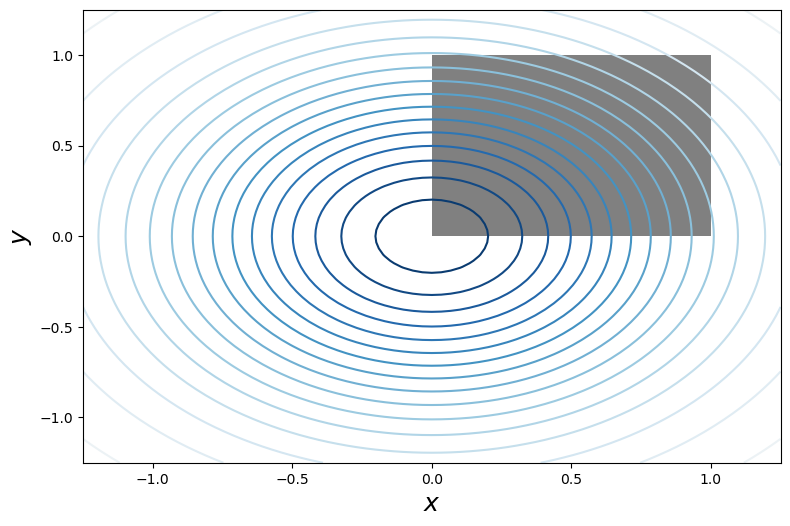

In [2]:
def f(x, y):
    return np.exp(-x**2 - y**2)

fig, ax = plt.subplots(figsize=(9,6), dpi=100)
x = y = np.linspace(-1.25, 1.25, 75)
X, Y = np.meshgrid(x, y)
c = ax.contour(X, Y, f(X,Y), 15, cmap=mpl.cm.RdBu, vmin=-1, vmax=1)
bound_rect = plt.Rectangle((0, 0), 1, 1, facecolor="grey")
ax.add_patch(bound_rect)
ax.axis('tight')
ax.set_xlabel('$x$', fontsize=18)
ax.set_ylabel('$y$', fontsize=18)

In [4]:
a, b = 0, 1
g = lambda x: 0
h = lambda x: 1
# g and h should always be functional form
integrate.dblquad(f, a, b, g, h)

In [5]:
integrate.dblquad(f, a, b, lambda x: -1 + x, lambda x: 1-x)

Triple integrals with `tplquad`
---

The form is:


$\int_a^b \int_{g(x)}^{h(x)} \int_{q(x,y)}^{r(x,y)} f(x,y,z)dxdydz $

In [6]:
def f(x,y,z):
    return np.exp(-x**2-y**2-z**2)
a, b = 0, 1
g, h = lambda x: 0, lambda x: 1
q, r = lambda x, y: 0, lambda x, y: 1
integrate.tplquad(f, a, b, g, h, q, r)

In [7]:
# using nquad
integrate.nquad(f, [(0, 1), (0, 1), (0, 1)])

In [8]:
def f(*args):
    """
    f(x1, x2, ... , xn) = exp(-x1^2 - x2^2 - ... – xn^2)
    """
    return np.exp(-np.sum(np.array(args)**2))

In [9]:
%time integrate.nquad(f, [(0,1)]*1)

CPU times: user 350 µs, sys: 19 µs, total: 369 µs
Wall time: 374 µs


In [10]:
%time integrate.nquad(f, [(0,1)]*2)

CPU times: user 7.09 ms, sys: 0 ns, total: 7.09 ms
Wall time: 6.8 ms


In [11]:
%time integrate.nquad(f, [(0,1)]*3)

CPU times: user 136 ms, sys: 3.95 ms, total: 140 ms
Wall time: 139 ms


In [12]:
%time integrate.nquad(f, [(0,1)]*4)

CPU times: user 2.21 s, sys: 2.64 ms, total: 2.21 s
Wall time: 2.21 s


In [13]:
%time integrate.nquad(f, [(0,1)]*5)

CPU times: user 48 s, sys: 282 ms, total: 48.2 s
Wall time: 48.2 s
